<a href="https://colab.research.google.com/github/MrCalmTam/AI_ANN/blob/main/CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import cifar100
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.utils import to_categorical #Onehot encoding convert

import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

In [2]:

# Distribute it to train and test set
(x_train, y_train), (x_val, y_val) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

169001437/169001437 [==============================] - 8s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


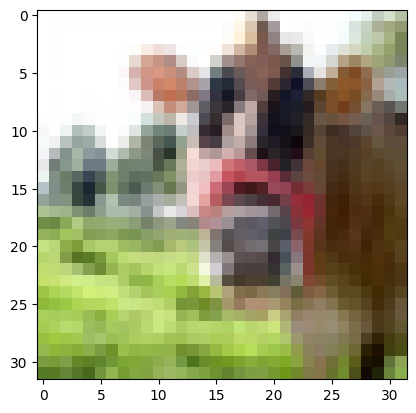

Cái này là: [19]


In [3]:

hinh = x_train[0]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cái này là:", y_train[0])
     

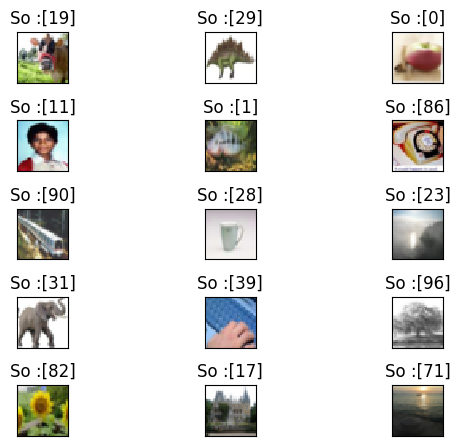

In [4]:


for i in range(15):
  plt.subplot(5,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Sequential()

model.add(Dense(1024, activation= 'relu',input_shape= (32*32*3,) )) #Gia tri toi uu
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(100, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 100)               5

In [6]:

x_train = x_train.reshape((50000, 32*32*3))
x_train = x_train.astype('float32')/255   
     

In [7]:

x_val = x_val.reshape((10000, 32*32*3))
x_val = x_val.astype('float32')/255

In [8]:

y_train = to_categorical(y_train, 100)
y_val = to_categorical(y_val, 100)     

In [9]:

model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(x_train, y_train,epochs= 20, batch_size= 256)
test_loss, test_acc = model.evaluate(x_val, y_val)
print('Độ chính xác:', test_acc)
print('Độ mất mát:', test_loss)
     

Epoch 1/20
196/196 [==============================] - 47s 232ms/step - loss: 4.5110 - accuracy: 0.0212
Epoch 2/20
196/196 [==============================] - 35s 180ms/step - loss: 4.2156 - accuracy: 0.0485
Epoch 3/20
196/196 [==============================] - 35s 178ms/step - loss: 4.0720 - accuracy: 0.0670
Epoch 4/20
196/196 [==============================] - 39s 199ms/step - loss: 3.9770 - accuracy: 0.0830
Epoch 5/20
196/196 [==============================] - 34s 172ms/step - loss: 3.8612 - accuracy: 0.1019
Epoch 6/20
196/196 [==============================] - 36s 183ms/step - loss: 3.7635 - accuracy: 0.1197
Epoch 7/20
196/196 [==============================] - 35s 178ms/step - loss: 3.6636 - accuracy: 0.1381
Epoch 8/20
196/196 [==============================] - 34s 175ms/step - loss: 3.5802 - accuracy: 0.1519
Epoch 9/20
196/196 [==============================] - 35s 180ms/step - loss: 3.5093 - accuracy: 0.1629
Epoch 10/20
196/196 [==============================] - 35s 178ms/step - l

In [11]:

model.save('cifar100.h5')

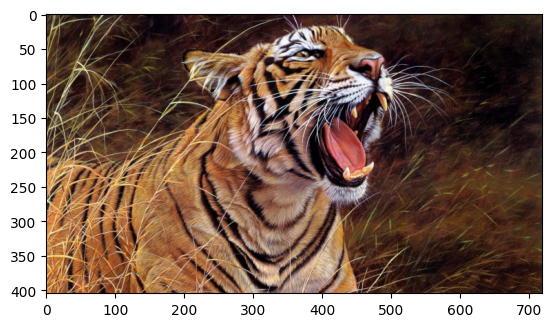

In [14]:
img = Image.open('ho.jpg')
imshow(img)

In [16]:

img = load_img('ho.jpg', target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)

1/1 [==============================] - 0s 133ms/step


array([36])